In [8]:
%pylab inline
import pandas as pd
import numpy
file = pd.read_csv("MNIST/train.csv")

Populating the interactive namespace from numpy and matplotlib


In [9]:
#Creating input and output DataFrames
labels = file["label"]
pixels = file.iloc[:,1:]

In [ ]:
# b) Write a function to display anMNIST digit. Display one of each digit.

In [128]:
labels

0        1
1        0
2        1
3        4
4        0
5        0
6        7
7        3
8        5
9        3
10       8
11       9
12       1
13       3
14       3
15       1
16       2
17       0
18       7
19       5
20       8
21       6
22       2
23       0
24       2
25       3
26       6
27       9
28       9
29       7
        ..
41970    2
41971    3
41972    4
41973    4
41974    3
41975    9
41976    2
41977    4
41978    4
41979    4
41980    7
41981    2
41982    8
41983    7
41984    3
41985    3
41986    0
41987    5
41988    0
41989    5
41990    3
41991    1
41992    9
41993    6
41994    4
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [10]:
pixels = pixels.as_matrix()
def displayNumber(pixels):
    matshow(pixels.reshape(28,28), cmap='gray')

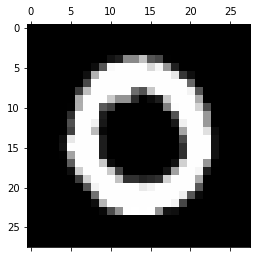

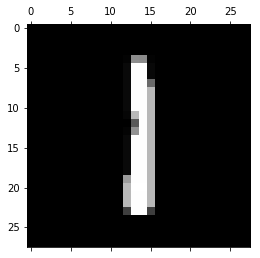

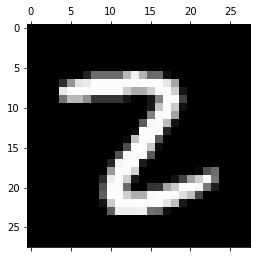

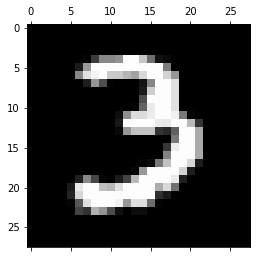

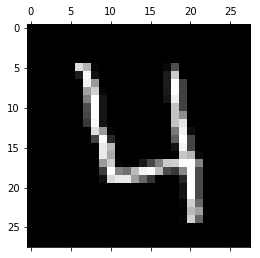

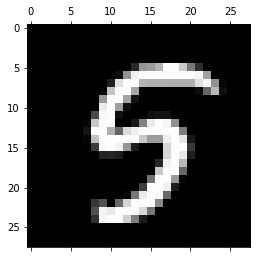

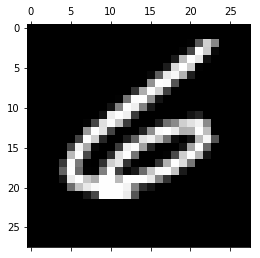

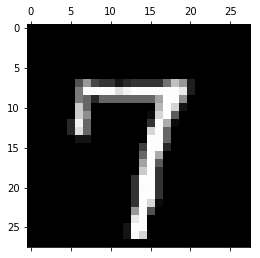

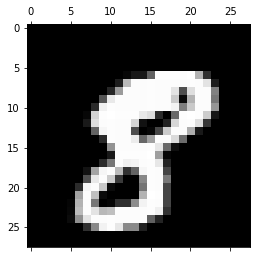

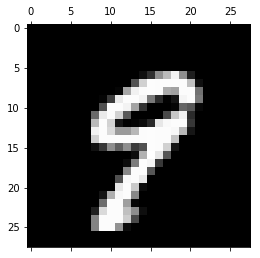

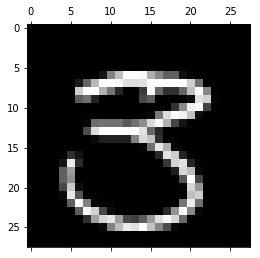

In [11]:
displayNumber(pixels[1])
displayNumber(pixels[2])
displayNumber(pixels[24])
displayNumber(pixels[9])
displayNumber(pixels[3])
displayNumber(pixels[8])
displayNumber(pixels[21])
displayNumber(pixels[6])
displayNumber(pixels[10])
displayNumber(pixels[11])
displayNumber(pixels[7])


In [ ]:
# c) Examine the prior probability of the classes in the training data.Is it uniform across the digits?(Ans= NO)

In [12]:
# To calculate the number of each digits
digits=[0]*10
for i in labels:
    digits[i]=digits[i]+1

In [13]:
# To calculate the prior probabilty of each digit
prior_prob=[]
for i in digits:
    prior_prob.append(i/len(labels))
    
print(prior_prob)

[0.09838095238095237, 0.11152380952380953, 0.09945238095238096, 0.1035952380952381, 0.09695238095238096, 0.09035714285714286, 0.0985, 0.10478571428571429, 0.09673809523809523, 0.09971428571428571]


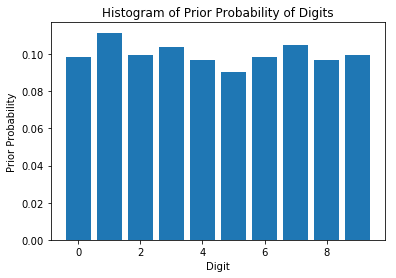

In [14]:
# To examine the prior probabilty of each digit
plt.title("Histogram of Prior Probability of Digits")
x_axis_digit=[0,1,2,3,4,5,6,7,8,9]
plt.bar(x_axis_digit,prior_prob)
plt.xlabel("Digit")
plt.ylabel("Prior Probability")


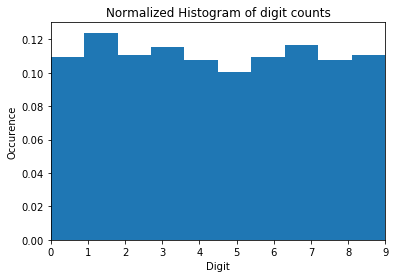

In [15]:
#Display a normalized histogram of digit counts. Is it even?(No)
plt.title("Normalized Histogram of digit counts")
plt.hist(labels,normed = 1)
plt.xlim(0,9)
plt.xlabel("Digit")
plt.ylabel("Occurence")

In [135]:
# Pick one example of each digit from your training data. Then, for each sample digit, compute
#and show the best match (nearest neighbor) between your chosen sample and the rest of
#the training data. Use L2 distance between the two images’ pixel values as the metric. This
#probably won’t be perfect, so add an asterisk next to the erroneous examples (if any).
labels

0        1
1        0
2        1
3        4
4        0
5        0
6        7
7        3
8        5
9        3
10       8
11       9
12       1
13       3
14       3
15       1
16       2
17       0
18       7
19       5
20       8
21       6
22       2
23       0
24       2
25       3
26       6
27       9
28       9
29       7
        ..
41970    2
41971    3
41972    4
41973    4
41974    3
41975    9
41976    2
41977    4
41978    4
41979    4
41980    7
41981    2
41982    8
41983    7
41984    3
41985    3
41986    0
41987    5
41988    0
41989    5
41990    3
41991    1
41992    9
41993    6
41994    4
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [16]:
def l2d(a,b):
    distances = (a-b)**2
    distances = distances.sum()
    distances = numpy.sqrt(distances)
    return distances



In [17]:
series=[7,1,2,24,9,3,8,21,6,10,11] 
for j in series:
    distance =l2d(pixels[j],pixels[0])
    index =0
   
    for i,value in enumerate(pixels):
        temp_distance=l2d(pixels[j],pixels[i])
        if i!=j and temp_distance<distance:
            distance = temp_distance
            index =i  
    if labels[j] != labels[index] :
        print ("Actual",labels[j],"Nearest",labels[index],"*")
    else:
        print ("Actual",labels[j],"Nearest",labels[index])
        
        
        
       

Actual 3 Nearest 5 *
Actual 0 Nearest 0
Actual 1 Nearest 1
Actual 2 Nearest 2
Actual 3 Nearest 3
Actual 4 Nearest 4
Actual 5 Nearest 5
Actual 6 Nearest 6
Actual 7 Nearest 7
Actual 8 Nearest 8
Actual 9 Nearest 9


In [ ]:
# e) Consider the case of binary comparison between the digits 0 and 1. Ignoring all the other
#digits, compute the pairwise distances for all genuine matches and all impostor matches,
#again using the L2 norm. Plot histograms of the genuine and impostor distances on the same
#set of axes.

In [18]:
zero=[]
one=[]
for i,value in enumerate(labels):
    if value ==0:
        zero.append(i)
    elif value==1:
        one.append(i)

In [19]:
gzeroes = []
gones = []
impostor=[]
for i in range(0,len(zero)-1):
    for j in range(i+1,len(zero)):
        gzeroes.append(l2d(pixels[zero[i]],pixels[zero[j]]))


In [20]:

for i in range(0,len(one)-1):
    for j in range(i+1,len(one)):
        gones.append(l2d(pixels[one[i]],pixels[one[j]]))
      


In [ ]:
for i in range(0,len(zero)):
    for j in range(0,len(one)):
        impostor.append(l2d(pixels[zero[i]],pixels[one[j]]))    

In [ ]:
# f) Generate an ROC curve from the above sets of distances. What is the equal error rate? What
# is the error rate of a classifier that simply guesses randomly?

In [ ]:
gen = gzeroes+gones
bins = numpy.linspace(500, 4500, 100)
pyplot.hist(gen, bins, alpha=0.5, label='Genuine Match')
pyplot.hist(impostor, bins, alpha=0.5, label='impostor Match')
pyplot.legend(loc='upper right')
pyplot.show()

In [5]:
def tpr_fpr(threshold):
    tp=0
    fn=0
    for i in gen:
        if i < threshold:
            tp=tp+1
        else:
            fn=fn+1

    fp=0
    tn=0
    for i in impostor:
        if i < threshold:
            fp=fp+1
        else:
            tn=tn+1
        
    tpr=(tp)/(tp+fn)
    fpr=(fp)/(fp+tn)
    return tpr,fpr

In [6]:
x=[]
y=[]
for i in range(0,5000,100):
    tpr,fpr=tpr_fpr(i)
    x.append(fpr)
    y.append(tpr)

NameError: name 'gen' is not defined

In [ ]:
import scikitplot.plotters as skplt
skplt.plot_roc_curve(y, x)

In [ ]:
def findMajorityClass(index, pixels, labels, k, sortedDistIndices):
	classCount = {}
    	# iterate k times from the closest item
    	for i in range(k):
        		voteIlabel = labels[sortedDistIndices[i]]
        		classCount[voteIlabel] = classCount.get(voteIlabel, 0)+1
    
   	#sort the items in the classCount
return sorted(classCount.items(), key=operator.itemgetter(1),   reverse=True)


In [ ]:
#(g). Implement a K-NN classifier. (You cannot use external libraries for this question; it should be your own implementation.) 

In [ ]:
#main function
def KNN(index, testImages, labels, k):
 	# calculate the distance between index and the current point
    	imagesSize = testImages.shape[0] #returns the number of rows
    	#calculate distance from index to each tested data point
    	diff = np.tile(index, (imagesSize, 1)) - testImages 
    	sqDiff = diff ** 2
    	sqDistances = sqDiff.sum(axis=1)
    	distances = sqDistances ** 0.5
    	sortedDistIndices = distances.argsort()
    
# take k items with lowest distances to index and find the #majority class
sortedClassCount = findMajorityClass(index, pixels, labels, k,  sortedDistIndices)
    
#return the first item in sortedClassCount to obtain the class #that got the most votes
    	return sortedClassCount[0][0]


In [ ]:
# (h). Using the training data for all digits, perform 3 fold cross-validation on your K-NN classifier and report your average accuracy. 

In [ ]:
from sklearn import cross_validation
allFolds = cross_validation.KFold(len(pixels), n_folds=3)
for training, testing in allFolds:
	print("%s %s" % (training, testing))


In [ ]:
#(i). Generate a confusion matrix (of size 10×10) from your results. Which digits are particularly tricky to classify?  

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = [] 
for i in allFolds:
    test, train = i
    pixel_train, pixel_test = pixel[train], pixel[test]
    label_train, label_test = label[train], label[test]
    result=KNNClassifier(pixel_test,pixel_train,3,train,test)
    print(len(result))
    for i in range(0,len(result)):
        y_pred.append(result[i])
    return numpy.mean((numpy.asarray(result)==y_test))
for i in all_folds:
    print(calculate_accuracy(i))
    
confusion_matrix(Y_true,y_pred)
